In [23]:
import pandas as pd
import glob as glo
import numpy as np 
import matplotlib as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as pltPP
import shap
from sklearn.metrics import roc_curve, roc_auc_score



# Unir os CSV's

In [ ]:
'''
arquivos = glo.glob("*.csv")
dados_unidos = pd.concat([pd.read_csv(arquivo, encoding='ISO-8859-1', delimiter=';') for arquivo in arquivos], ignore_index=True)
dados_unidos = dados_unidos.drop_duplicates()

# Ordenar os dados por ano e semestre (supondo que existam colunas chamadas 'Ano' e 'Semestre')
dados_unidos = dados_unidos.sort_values(by=['Ingresso']).reset_index(drop=True)

# Salvar o resultado em um novo arquivo CSV
dados_unidos.to_csv('dados_unidos.csv', index=False, encoding='ISO-8859-1') 

'-------------------------------------------------------------------------------------------------------------------------------------------------------------------'

arquivos2 = glo.glob("*.csv")
dados_unidos2 = pd.concat([pd.read_csv(arquivo, encoding='ISO-8859-1', delimiter=';') for arquivo in arquivos2], ignore_index=True)
dados_unidos2 = dados_unidos2.drop_duplicates()

# Ordenar os dados por ano e semestre (supondo que existam colunas chamadas 'Ano' e 'Semestre')
dados_unidos2 = dados_unidos2.sort_values(by=['Ano']).reset_index(drop=True)

# Salvar o resultado em um novo arquivo CSV
dados_unidos2.to_csv('dados_unidos.csv', index=False, encoding='ISO-8859-1') 

'''


In [ ]:
'''
base_se = pd.read_csv('dados_se.csv', encoding='ISO-8859-1')          # carrega a base de dados socioeconômicos
base_evasao = pd.read_csv('dados_evasao.csv', encoding='ISO-8859-1')  # carrega a base de dados de evasão 

'''

In [2]:
base1 = pd.read_csv('base1.csv', encoding='ISO-8859-1')    # carregar a base

# Tratando os dados

## preenchendo NA


In [3]:
# preenchendo NA

base1['Escola'] = base1['Escola'].fillna(base1['EscPub'].map({'S': 'pública'}))    # juntando os valores de duas colunas que dizem respeito à educação 
base1['Cor'] = base1['Cor'].fillna(base1['PPI'].map({1: 'Preta'}))    # juntando valores sobre a cor 
base1['Nt.Final'] = base1['Nt.Final'].fillna(base1['Nt.Final'].mean()) # preenchendo com a média da nota do enem 
#base1['Nome do Curso'] = base1['Nome do Curso'].fillna(base1['Nome do Curso'].mode) # preenchendo com a média do curso 
#base1['UF'] = base1['UF'].fillna(base1['UF'].mode) # preenchendo com a média do curso 
#base1.dropna(subset=['Cor'], inplace=True)

## criação de dummies

In [4]:
# criando dummies se ele é preto, pardo, indigenos ou deficiente

base1['PPI'] = base1['PPI'].fillna('0')
base1['PPI'] = base1['PPI'].map({            # Se é PPI
    "0": 0,
    "S": 1
})

base1['Defi'] = base1['Defi'].fillna('0')
base1['Defi'] = base1['Defi'].map({            # Se é deficiente 
    "0": 0,
    "S": 1
})

base1['DNoturno'] = base1['Turno'].map({            # Se o curso é noturno
    'Integral' : 0,
    'Manhã' : 0,
    'Tarde' : 0,
    'Noite': 1
})

# base1['DConterrâneo'] = base1['Município de Nascimento'].map({            # Se o curso é noturno
#     'Integral' : 0,
#     'Manhã' : 0,
#     'Tarde' : 0,
#     'Noite': 1
# })


base1['DRiograndese'] = np.where(base1['Município de Nascimento']=="Rio Grande", 1, 0)

## dropando variáveis

In [5]:
# dropando variáveis 

base1 = base1.drop(columns="Renda<")   # já tenho outra variável q mede a renda familiar
base1 = base1.drop(columns="Quilo")    # é uma coluna vazia
base1 = base1.drop(columns="Indig")    # é uma coluna vazia

base1 = base1.drop(columns="Nt.Ling")   
base1 = base1.drop(columns="Nt.Huma")    
base1 = base1.drop(columns="Nt.Natu")    # não precisa das notas de cada prova do enem. O total já é o suficiente
base1 = base1.drop(columns="Nt.Mate")   
base1 = base1.drop(columns="Nt.Reda")   

base1 = base1.drop(columns="EscPub")   # dropando essa pq já tem uma coluna que diz se o aluno é de particular ou pública 

base1 = base1.drop(columns="Situ.Sem") # n preciso do semestre da avaliação - deixar
base1 = base1.drop(columns="Sem Ing")  # não preciso do semestre do ingresso                     # deixei duas colunas: o ano q entrou e o ano q formou/saiu 
base1 = base1.drop(columns="Ingresso_x") # coluna reduntante, já tenho outra igual 
base1 = base1.drop(columns="Ano")   # coluna reduntante, já tenho outra igual 
base1 = base1.drop(columns="Sem")  # coluna reduntante, já tenho outra igual 

base1 = base1.drop(columns="CPF")   # não preciso do CPF pq tem matrícula se precisar identificar 
base1 = base1.drop(columns="Cur")   # não preciso pq já trasnformei os cursos em números 

base1 = base1.drop(columns="Ind.Mat")
base1 = base1.drop(columns="%Realiz")
base1 = base1.drop(columns="CH Tranc")
base1 = base1.drop(columns="CH Aprov")
base1 = base1.drop(columns="CH RF")
base1 = base1.drop(columns="CH Tot")
base1 = base1.drop(columns="PPI")
base1 = base1.drop(columns="Ingresso_y")
base1 = base1.drop(columns="PreEsc")
base1 = base1.drop(columns="Anos no Ens.Fund.")
base1 = base1.drop(columns="Anos no Ens.Médio")
base1 = base1.drop(columns="Nível")
base1 = base1.drop(columns="Campus/Pólo")
base1 = base1.drop(columns="CH Repr")
base1 = base1.drop(columns="Município de Nascimento")


In [ ]:
'''


# convertendo para categoria todas as variáveis categóricas. A maioria terei que associar números às categorias.

base1['Escolaridade do Pai'] = base1['Escolaridade do Pai'].astype('category') # transformei em número
base1['Escolaridade da Mãe'] = base1['Escolaridade da Mãe'].astype('category') # transformei em número
base1['Faixa de Renda em SM'] = base1['Faixa de Renda em SM'].astype('category') # não
base1['Casa de Moradia'] = base1['Casa de Moradia'].astype('category')  # transformei em número
base1['Escola Ens.Fund.'] = base1['Escola Ens.Fund.'].astype('category') # transformei em número
base1['Anos no Ens.Fund.'] = base1['Anos no Ens.Fund.'].astype('category') 
base1['Escola Ens.Médio'] = base1['Escola Ens.Médio'].astype('category')   # transformei em número
base1['Possui Automóvel'] = base1['Possui Automóvel'].astype('category')    # transformei em número
base1['Possui Internet'] = base1['Possui Internet'].astype('category')    # transformei em número
base1['Possui Empregada'] = base1['Possui Empregada'].astype('category')    # transformei em número
base1['Nome do Curso'] = base1['Nome do Curso'].astype('category')   # trasnformei em número
base1['Campus/Pólo'] = base1['Campus/Pólo'].astype('category')      # transformei em número
base1['Turno'] = base1['Turno'].astype('category')   # transformei em número
base1['UF'] = base1['UF'].astype('category') # transformei em número
base1['Sx'] = base1['Sx'].astype('category') # transformei em número
base1['Escola'] = base1['Escola'].astype('category')  # excluir 
base1['Cor'] = base1['Cor'].astype('category') 
base1['Ingresso_y'] = base1['Ingresso_y'].astype('category') 
base1['PROAI'] = base1['PROAI'].astype('category') 
base1['EscPub'] = base1['EscPub'].astype('category') # excluir
base1['Renda<'] = base1['Renda<'].astype('category') # excluir 
base1['PPI'] = base1['PPI'].astype('category')     # ver o que fazer depois
base1['Defi'] = base1['Defi'].astype('category')   # ver o que fazer depois
base1['Quilo'] = base1['Quilo'].astype('category') # ver o que fazer depois
base1['Indig'] = base1['Indig'].astype('category') # ver o que fazer depois
base1['Situação'] = base1['Situação'].astype('category')   # essa é a variável que eu quero prever. Tenho que ver com o professor se tiro todas que não são formado e abandono
base1['Alim'] = base1['Alim'].astype('category')   # transformei em número
base1['Morad'] = base1['Morad'].astype('category')  # transformei em número
base1['Trans'] = base1['Trans'].astype('category') # transformei em número
base1['Bolsa'] = base1['Bolsa'].astype('category') # transformei em número
base1['PreEsc'] = base1['PreEsc'].astype('category') # transformei em número
base1['Monit'] = base1['Monit'].astype('category') # transformei em número
base1['Estag'] = base1['Estag'].astype('category') # transformei em número
base1['Município de Nascimento'] = base1['Município de Nascimento'].astype('category') 


'''

In [6]:


# Associando números para as classes - o randomforest lida melhor com números. 

# Porém, vou deixar essa linha comentada. Só vou rodá-la quando for a hora de aplicar o RF. Antes disso, principalmente na análise exploratória, vou lidar com os dados rotulados. 
# Porque fica melhor e mais intuitivo de ver e analisar.


# Dicionário das variáveis para me guiar
dic_Escolaridade_do_Pai = {
    '0': 'Não sei',
    '1': 'Não estudou',
    '2': 'Primário',
    '3': 'Ginásio',
    '4': 'Ens.Médio',
    '5': 'Ens.Sup.',
    '6': 'Especialização',
    '7': 'Mestrado',
    '8': 'Doutorado',
    }
dic_Escolaridade_da_Mae = {
    '0': 'Não sei',
    '1': 'Não estudou',
    '2': 'Primário',
    '3': 'Ginásio',
    '4': 'Ens.Médio',
    '5': 'Ens.Sup.',
    '6': 'Especialização',
    '7': 'Mestrado',
    '8': 'Doutorado',
    }
dic_Casa_de_moradia = {
    '0': 'Alugada',
    '1': 'Cedida',
    '2': 'Financiada',
    '3': 'Própria',
    '4': 'Outra',
    }
dic_Escola_Ens_Fund = {
    '0': 'Pública',
    '1': 'Particular',
    }
dic_Escola_Ens_Medio = {
    '0': 'Pública',
    '1': 'Particular',
    '2': 'Esc.xxxxxxx'
    }
dic_Possui_automovel = {
    '0': 'Não',
    '1': 'Sim'
    }
dic_Possui_internet = {
    '0': 'Não',
    '1': 'Sim'
    }
dic_Possui_empregada = {
    '0': 'Não',
    '1': 'Sim'
    }
dic_Curso = {
    '0': 'Administração',
    '1': 'Arqueologia',
    '2': 'Arquivologia',
    '3': 'Artes Vis. Bach.',
    '4': 'Artes Vis. Lic.',
    '5': 'Biblioteconomia',
    '6': 'Biologia Bach.',
    '7': 'Biologia Lic.',
    '8': 'Direito Diurno',
    '9': 'Direito Noturno',
    '10': 'Economia',
    '11': 'Enfermagem',
    '12': 'Eng. Agroq. -SAP',
    '13': 'Eng.Alimentos',
    '14': 'Eng.Automação',
    '15': 'Eng.Bioquímica',
    '16': 'Eng.Civil',
    '17': 'Eng.Civil Emp.',
    '18': 'Eng.Civil Port.',
    '19': 'Eng.Computação',
    '20': 'Eng.Ind.Ali. -SAP',
    '21': 'Eng.Mec.Emp.',
    '22': 'Eng.Mec.Naval',
    '23': 'Eng.Mecânica',
    '24': 'Eng.Química',
    '25': 'Física Bach.',
    '26': 'Física Lic.',
    '27': 'Geografia Bach.',
    '28': 'Geografia Lic.',
    '29': 'Gestão Amb.',
    '30': 'Gestão Amb. -SLS',
    '31': 'História Bach.',
    '32': 'História Lic.',
    '33': 'Let.Port.Esp.-Dia',
    '34': 'Let.Port.Esp.-Not',
    '35': 'Let.Port.Francês',
    '36': 'Let.Port.Inglês',
    '37': 'Letras Português',
    '38': 'Matemática Aplic.',
    '39': 'Matemática Lic.',
    '40': 'Medicina',
    '41': 'Oceanologia',
    '42': 'Pedagogia Diurno',
    '43': 'Pedagogia Noturno',
    '44': 'Psicologia',
    '45': 'Química Bach.',
    '46': 'Química Lic.',
    '47': 'Sistemas Info.',
    '48': 'Toxicologia Amb.',
    '49': 'Turismo - SVP',
    }
dic_Campus = {
    '0': 'RGr/Carreiros',
    '1': 'RGr/Saúde',
    '2': 'SAP',
    '3': 'SLS',
    '4': 'SVP',
}
dic_Turno = {
    '0': 'Integral',
    '1': 'Manhã',
    '2': 'Noite',
    '3': 'Tarde',
}
dic_UF = {
    '0': 'AC',
    '1': 'AM',
    '2': 'AP',
    '3': 'BA',
    '4': 'CE',
    '5': 'DF',
    '6': 'ES',
    '7': 'GO',
    '8': 'MA',
    '9': 'MG',
    '10': 'MS',
    '11': 'MT',
    '12': 'PA',
    '13': 'PB',
    '14': 'PE',
    '15': 'PI',
    '16': 'PR',
    '17': 'RJ',
    '18': 'RN',
    '19': 'RO',
    '20': 'RS',
    '21': 'SC',
    '22': 'SE',
    '23': 'SP',
    '24': 'TO'
}
dic_Sexo = {
    '0': 'F',
    '1': 'M',  
}
dic_Cor = {
    '0': 'Preta',
    '1': 'Parda',  
    '2': 'Indígena',
    '3': 'Amarela',  
    '4': 'Branca',
    '5': 'NãoDeclara',  
}
dic_Ingresso = {
    '0': 'SISU',
    '1': 'VagaRema',  
    '2': 'Outros', 
}
dic_PROAI = {
    '0': 'A1',
    '1': 'L1',  
    '2': 'L2', 
    '3': 'L3',
    '4': 'L4',  
    '5': 'AC', 
}
dic_situacao = {
    '0': 'Abandono',
    '1': 'Formado',  
    '2': 'Afast.Mobi.', 
    '3': 'Afast.Saúde',
    '4': 'Afast.Temp.',  
    '5': 'Desligado', 
    '6': 'Falecido',
    '7': 'Jubilado',  
    '8': 'Matri', 
    '9': 'Muda.Curso',
    '10': 'Transferido',  
}
dic_alimentacao = {
    '0': 'N',
    '1': 'S' 
}
dic_moradia = {
    '0': 'N',
    '1': 'S' 
}
dic_transporte = {
    '0': 'N',
    '1': 'S' 
}
dic_bolsa = {
    '0': 'N',
    '1': 'S' 
}
dic_PreEsc = {
    '0': 'N',
    '1': 'S' 
}
dic_Monitoria = {
    '0': 'N',
    '1': 'S' 
}
dic_Estagio = {
    '0': 'N',
    '1': 'S' 
}
dic_Faixa_de_Renda_em_SM = {
    '0': '0',
    '1': 'até 1',
    '2': '1 a 1,5',
    '3': '1,5 a 2',
    '4': '2 a 2,5',
    '5': '2,5 a 3',
    '6': '3 a 4',
    '7': '2 a 5',
    '8': '4 a 5',
    '2': '5 a 6',
    '3': '5 a 7',
    '4': '6 a 7',
    '5': '7 a 8',
    '6': '7 a 10',
    '7': '8 a 9',
    '8': '9 a 10',
    '2': '10 a 12',
    '3': '12 a 15',
    '4': '15 a 20',
    '5': '15 a 30',
    '6': '> 20',
    '7': '> 30',
    }


################################################################################################################################################################################################

# Transformar as variáveis
# base1['Escolaridade do Pai'] = base1['Escolaridade do Pai'].map({            # escolaridade do pai
#     "Não sei": 0,
#     "Não estudou": 1,
#     "Primário": 2,
#     "Ginásio": 3,
#     "Ens.Médio": 4,
#     "Ens.Sup.": 5,
#     "Especialização": 6,
#     "Mestrado": 7,
#     "Doutorado": 8
# })

# base1['Escolaridade da Mãe'] = base1['Escolaridade da Mãe'].map({           # escolaridade da mãe
#     "Não sei": 0,
#     "Não estudou": 1,
#     "Primário": 2,
#     "Ginásio": 3,
#     "Ens.Médio": 4,
#     "Ens.Sup.": 5,
#     "Especialização": 6,
#     "Mestrado": 7,
#     "Doutorado": 8
# })
# base1['Casa de Moradia'] = base1['Casa de Moradia'].map({           # tipo de moradia 
#     "Alugada": 0,
#     "Cedida": 1,
#     "Financiada": 2,
#     "Própria": 3,
#     "Outra": 4,
# })
base1['Escola Ens.Fund.'] = base1['Escola Ens.Fund.'].map({           # tipo de escola no fundamental
    "Pública": 0,
    "Particular": 1,
})
base1['Escola Ens.Médio'] = base1['Escola Ens.Médio'].map({           # tipo de escola no medio
    "Pública": 0,
    "Particular": 1,
    'Esc.xxxxxxx': 2
})
base1['Possui Automóvel'] = base1['Possui Automóvel'].map({           # se tem carro ou moto
    "Não": 0,
    "Sim": 1
})
base1['Possui Internet'] = base1['Possui Internet'].map({           # se tem internet em casa e/ou no celular
    "Não": 0,
    "Sim": 1
})
base1['Possui Empregada'] = base1['Possui Empregada'].map({           # se tem empregada em casa
    "Não": 0,
    "Sim": 1
})
# base1['Nome do Curso'] = base1['Nome do Curso'].map({            # qual curso faz
#     "Administração": 0,
#     "Arqueologia": 1,
#     "Arquivologia": 2,
#     "Artes Vis. Bach.": 3,
#     "Artes Vis. Lic.": 4,
#     "Biblioteconomia": 5,
#     "Biologia Bach.": 6,
#     "Biologia Lic.": 7,
#     "Direito Diurno": 8,
#     "Direito Noturno": 9,
#     "Economia": 10,
#     "Enfermagem": 11,
#     "Eng. Agroq. -SAP": 12,
#     "Eng.Alimentos": 13,
#     "Eng.Automação": 14,
#     "Eng.Bioquímica": 15,
#     "Eng.Civil": 16,
#     "Eng.Civil Emp.": 17,
#     "Eng.Civil Port.": 18,
#     "Eng.Computação": 19,
#     "Eng.Ind.Ali. -SAP": 20,
#     "Eng.Mec.Emp.": 21,
#     "Eng.Mec.Naval": 22,
#     "Eng.Mecânica": 23,
#     "Eng.Química": 24,
#     "Física Bach.": 25,
#     "Física Lic.": 26,
#     "Geografia Bach.": 27,
#     "Geografia Lic.": 28,
#     "Gestão Amb.": 29,
#     "Gestão Amb. -SLS'": 30,
#     "História Bach.": 31,
#     "História Lic.": 32,
#     "Let.Port.Esp.-Dia": 33,
#     "Let.Port.Esp.-Not": 34,
#     "Let.Port.Francês": 35,
#     "Let.Port.Inglês": 36,
#     "Letras Português": 37,
#     "Matemática Aplic.": 38,
#     "Matemática Lic.": 39,
#     "Medicina": 40,
#     "Oceanologia": 41,
#     "Pedagogia Diurno": 42,
#     "Pedagogia Noturno": 43,
#     "Psicologia": 44,
#     "Química Bach.": 45,
#     "Química Lic.": 46,
#     "Sistemas Info.": 47,
#     "Toxicologia Amb.": 48,
#     "Turismo - SVP": 49,  
# })
# base1['Campus/Pólo'] = base1['Campus/Pólo'].map({            # qual campus 
#     "RGr/Carreiros": 0,
#     "RGr/Saúde": 1,
#     "SAP": 2,
#     "SLS": 3,
#     "SVP": 4,
#})
base1['Turno'] = base1['Turno'].map({            # turno do curso
    "Integral": 0,
    "Manhã": 1,
    "Noite": 2,
    "Tarde": 3,
})
# base1['UF'] = base1['UF'].map({            # eestado que veio
#     "AC": 24,
#     "AM": 22,
#     "AP": 21,
#     "BA": 11,
#     "CE": 16,
#     "DF": 8,
#     "ES": 6,
#     "GO": 9,
#     "MA": 18,
#     "MG": 4,
#     "MS": 7,
#     "MT": 10,
#     "PA": 20,
#     "PB": 14,
#     "PE": 13,
#     "PI": 17,
#     "PR": 2,
#     "RJ": 5,
#     "RN": 15,
#     "RO": 23,
#     "RS": 0,
#     "SC": 1,
#     "SE": 12,
#     "SP": 3,
#     "TO": 19
# })
#base1['UF'] = base1['UF'].cat.add_categories([25]) # 25 é NA
base1['Sx'] = base1['Sx'].map({            # gênero 
    "F": 0,
    "M": 1,
})
#base1['Sx'] = base1['Sx'].cat.add_categories([2]) # o 2 é NA
base1['Cor'] = base1['Cor'].map({            # cor da pessoa
    "Preta": 0,
    "Parda": 1,
    "Indígena": 2,
    "Amarela": 3,
    "Branca": 4,
    "NãoDeclara": 5,
})
#base1['Cor'] = base1['Cor'].cat.add_categories([6]) # o 6 é NA
# base1['Ingresso_y'] = base1['Ingresso_y'].map({            # forma de ingresso
#     "SISU": 0,
#     "VagaRema": 1,
#     "Outros": 2,
# })
base1['PROAI'] = base1['PROAI'].map({            # cota de ingresso
    "A1": 0,
    "L1": 1,
    "L2": 2,
    "L3": 3,
    "L4": 4,
    "AC": 5,
})
base1['Situação'] = base1['Situação'].map({            # como ta atualmente
    "Abandono": 0,
    "Formado": 1,
    "Afast.Mobi.": 2,
    "Afast.Saúde": 3,
    "Afast.Temp.": 4,
    "Desligado": 5,
    "Falecido": 6,
    "Jubilado": 7,
    "Matri": 8,
    "Muda.Curso": 9,
    "Transferido": 10,
})
base1['Alim'] = base1['Alim'].map({            # se tem auxilio de alimentação
    "N": 0,
    "S": 1
})
base1['Morad'] = base1['Morad'].map({            # se tem auxilio de moradia
    "N": 0,
    "S": 1
})
base1['Trans'] = base1['Trans'].map({            # se tem auxilio de trasnporte
    "N": 0,
    "S": 1
})
base1['Bolsa'] = base1['Bolsa'].map({            # se tem alguma bolsa
    "N": 0,
    "S": 1
})
# base1['PreEsc'] = base1['PreEsc'].map({            # não sei o que é isso
#     "N": 0,
#     "S": 1
# })
base1['Monit'] = base1['Monit'].map({            # se dá monitoria
    "N": 0,
    "S": 1
})
base1['Estag'] = base1['Estag'].map({            # se tem estágio ou não 
    "N": 0,
    "S": 1
})
# base1['Faixa de Renda em SM'] = base1['Faixa de Renda em SM'].map({            # cor da pessoa
#     "0": 0,
#     "até 1": 1,
#     "1 a 1,5": 2,
#     "1,5 a 2": 3,
#     "2 a 2,5": 4,
#     "2,5 a 3": 4,
#     "3 a 4": 5,
#     "2 a 5": 0,
#     "4 a 5": 1,
#     "5 a 6": 2,
#     "5 a 7": 0,
#     "6 a 7": 3,
#     "7 a 8": 4,
#     "7 a 10": 4,
#     "8 a 9": 5,
#     "9 a 10": 0,
#     "10 a 12": 1,
#     "12 a 15": 2,
#     "15 a 20": 3,
#     "15 a 30": 4,
#     "> 20": 5,
#     "> 30": 0,
# })
base1['Escola'] = base1['Escola'].map({           # tipo de moradia 
    "Pública": 1,
    "pública": 1,
    "Privada": 0,
})

In [7]:
#colocando essa depois porque tem que transformar antes --- preenchendo com modas os NA

base1['UF'] = base1['UF'].fillna(base1['UF'].mode()[0]) 
base1['Nome do Curso'] = base1['Nome do Curso'].fillna(base1['Nome do Curso'].mode()[0])
base1['Sx'] = base1['Sx'].fillna(base1['Sx'].mode()[0])
base1['Escola'] = base1['Escola'].fillna(base1['Escola'].mode()[0])

## transformar float em inteiro

In [8]:
base1['Pessoas na casa'] = base1['Pessoas na casa'].astype(int)
#base1['UF'] = base1['UF'].astype(int)
#base1['Nome do Curso'] = base1['Nome do Curso'].astype(int)
base1['Sx'] = base1['Sx'].astype(int)
base1['Escola'] = base1['Escola'].astype(int)
#base1['Cor'] = base1['Cor'].astype(int)

_____

## parte dedicada para modelos alternativos

In [9]:
# essa célula é pra eu escolher se eu vou querer usar a variável cor preenchida com a média, dropada NA ou apenas uma dummie para pessoa branca.



# base1.dropna(subset=['Cor'], inplace=True)

base1['Cor'] = base1['Cor'].fillna(6)
base1['DBranca'] = base1['Cor'].map({            # cor da pessoa
    0: 0,
    1: 0,
    2: 0,
    3: 0,
    4: 1,
    5: 0,
    6: 0
})

base1 = base1.drop(columns="Cor")

############################################################################################

#com a coluna preenchido com a moda 

# base1['Cor'] = base1['Cor'].fillna(base1['Cor'].mode()[0])
# base1['Cor'] = base1['Cor'].astype(int)


In [ ]:
# dummie de escolaridade dos pais  ---------- Não ficou bom 


# base1['Escolaridade do Pai'] = base1['Escolaridade do Pai'].map({            # escolaridade do pai
#     0: 1,
#     1: 1,
#     2: 1,
#     3: 1,
#     4: 1,
#     5: 0,
#     6: 0,                                                                    
#     7: 0,
#     8: 0
# })

# base1['Escolaridade da Mãe'] = base1['Escolaridade da Mãe'].map({            # escolaridade do pai
#     0: 1,
#     1: 1,
#     2: 1,
#     3: 1,
#     4: 1,
#     5: 0,
#     6: 0,
#     7: 0,
#     8: 0
# })


In [ ]:
# separar por região ------- não ficou legal tbm

# base1['Região'] = base1['UF'].map({            # eestado que veio
#     0: 4,
#     1: 1,
#     2: 4,
#     3: 3,
#     4: 4,
#     5: 2,
#     6: 1,
#     7: 2,
#     8: 3,
#     9: 1,
#     10: 2,
#     11: 2,
#     12: 4,
#     13: 3,
#     14: 3,
#     15: 3,
#     16: 0,
#     17: 1,
#     18: 3,
#     19: 4,
#     20: 0,
#     21: 0,
#     22: 3,
#     23: 1,
#     24: 4
# })

# base1 = base1.drop(columns="UF")

In [10]:
# dummie para cursos de exatas


# base1['Curso_Exatas'] = base1['Nome do Curso'].map({
#     0: 0,  # Administração
#     1: 0,  # Arqueologia
#     2: 0,  # Arquivologia
#     3: 0,  # Artes Vis. Bach.
#     4: 0,  # Artes Vis. Lic.
#     5: 0,  # Biblioteconomia
#     6: 1,  # Biologia Bach.
#     7: 1,  # Biologia Lic.
#     8: 0,  # Direito Diurno
#     9: 0,  # Direito Noturno
#     10: 0, # Economia
#     11: 1, # Enfermagem
#     12: 1, # Eng. Agroq. -SAP
#     13: 1, # Eng. Alimentos
#     14: 1, # Eng. Automação
#     15: 1, # Eng. Bioquímica
#     16: 1, # Eng. Civil
#     17: 1, # Eng. Civil Emp.
#     18: 1, # Eng. Civil Port.
#     19: 1, # Eng. Computação
#     20: 1, # Eng. Ind. Ali. -SAP
#     21: 1, # Eng. Mec. Emp.
#     22: 1, # Eng. Mec. Naval
#     23: 1, # Eng. Mecânica
#     24: 1, # Eng. Química
#     25: 1, # Física Bach.
#     26: 1, # Física Lic.
#     27: 0, # Geografia Bach.
#     28: 0, # Geografia Lic.
#     29: 0, # Gestão Amb.
#     30: 0, # Gestão Amb. -SLS
#     31: 0, # História Bach.
#     32: 0, # História Lic.
#     33: 0, # Let. Port. Esp.-Dia
#     34: 0, # Let. Port. Esp.-Not
#     35: 0, # Let. Port. Francês
#     36: 0, # Let. Port. Inglês
#     37: 0, # Letras Português
#     38: 1, # Matemática Aplic.
#     39: 1, # Matemática Lic.
#     40: 1, # Medicina
#     41: 1, # Oceanologia
#     42: 0, # Pedagogia Diurno
#     43: 0, # Pedagogia Noturno
#     44: 0, # Psicologia
#     45: 1, # Química Bach.
#     46: 1, # Química Lic.
#     47: 1, # Sistemas Info.
#     48: 1, # Toxicologia Amb.
#     49: 0, # Turismo - SVP
# })

# Remover a coluna original, se necessário
#base1 = base1.drop(columns="Nome do Curso")





In [10]:
# transformar em colunas dummies 

base1 = pd.get_dummies(base1, columns=['UF'], prefix='UF', drop_first=True)
base1 = pd.get_dummies(base1, columns=['Escolaridade do Pai'], prefix='EscolaridadePai', drop_first=True)
base1 = pd.get_dummies(base1, columns=['Escolaridade da Mãe'], prefix='EscolaridadeMãe', drop_first=True)
base1 = pd.get_dummies(base1, columns=['Nome do Curso'], prefix='Curso', drop_first=True)
base1 = pd.get_dummies(base1, columns=['Faixa de Renda em SM'], prefix='Faixa de renda', drop_first=True)
base1 = pd.get_dummies(base1, columns=['Casa de Moradia'], prefix='Casa', drop_first=True)

____

## criar idade de ingresso do indivíduo

In [11]:
base1['Nascto.'] = pd.to_datetime(base1['Nascto.'], format='%d/%m/%Y')

# Criar a coluna com a idade ao entrar na universidade
base1['Idade ao Ingressar'] = base1['Ano Ing'] - base1['Nascto.'].dt.year

base1 = base1.drop(columns="Nascto.")

base1 = base1.drop(columns="Situ.Ano")
base1 = base1.drop(columns="Matri")
base1 = base1.drop(columns="Turno")


# Por último, filtrar o que é evadido e o que não

In [12]:
base1['Devadido'] = base1['Situação'].map({           # tipo de moradia 
    3: 1,
    4: 1,
    0: 1,
    5: 1,
    7: 1,
    9: 1,
    10: 1,
    8: 0,
    1: 0,
})
base1['Devadido'] = base1['Devadido'].fillna(base1['Devadido'].mode()[0])
base1['Devadido'] = base1['Devadido'].astype(int)

base1 = base1[base1['Situação'] != 6 & 2]   # excluindo mobilidade e falecido 

### últimas modificações

In [13]:
base1 = base1.drop(columns="Ano Ing")
base1 = base1.drop(columns="Coef.Rend")
base1 = base1.drop(columns="Situação")
base1 = base1.drop(columns="Nt.Média")
#base1 = base1.drop(columns="Nome do Curso")
base1 = base1.drop(columns="Nt.Final")

# Análise exploratória

In [ ]:
base1.hist(bins=50, figsize=(30,25))

In [ ]:
matriz_correl = base1.corr()
matriz_correl

# dividindo a base de dados

In [14]:

Y = base1['Devadido']  # descolando o target
X = base1.drop('Devadido', axis=1)  # dropando o target da base


# Dividindo em 80% treino e 20% teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=42)


# rodando o modelo

In [15]:
Modelo1 = RandomForestClassifier(
    n_estimators=500,      # Número de árvores
    max_depth=50,          # Profundidade máxima das árvores
    min_samples_leaf=4,    # Mínimo de amostras por folha
    max_features='sqrt',   # Usar a raiz quadrada do número de features em cada divisão
    random_state=46,
    class_weight="balanced_subsample" # aumenta o peso da classe evadido
)
Modelo1.fit(X_treino, Y_treino)
Y_treino_pred = Modelo1.predict(X_treino)


In [16]:
print("Acurácia do modelo para o treino:")

print(accuracy_score(Y_treino, Y_treino_pred))
print('')
print("Matriz de confusão para o treino:")

print(confusion_matrix(Y_treino, Y_treino_pred))   

Acurácia do modelo para o treino:
0.8334310850439882

Matriz de confusão para o treino:
[[1213  229]
 [ 339 1629]]


In [17]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Modelo1, X_treino, Y_treino, cv=7, scoring="accuracy")
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.66803279 0.66529774 0.66119097 0.67556468 0.65708419 0.70225873
 0.67967146]
0.67 accuracy with a standard deviation of 0.01


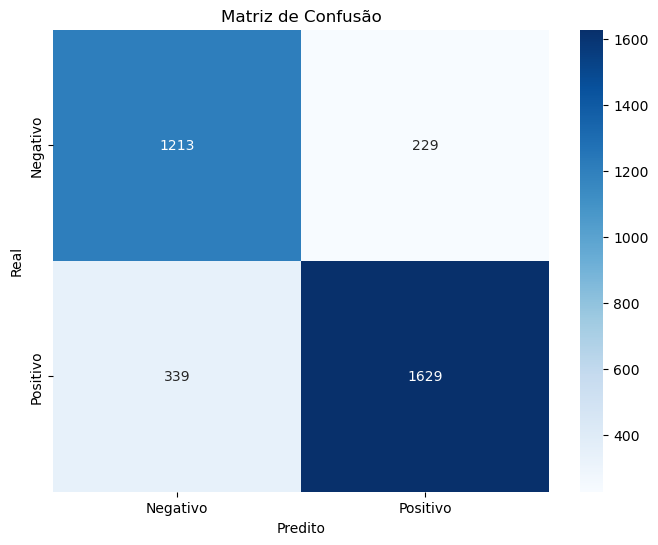

In [19]:

cm = confusion_matrix(Y_treino, Y_treino_pred)

pltPP.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negativo', 'Positivo'], 
            yticklabels=['Negativo', 'Positivo'])
pltPP.xlabel('Predito')
pltPP.ylabel('Real')
pltPP.title('Matriz de Confusão')
pltPP.show()


In [18]:
print("Precisão do modelo, call, f1-score e support:")
print(classification_report(Y_treino, Y_treino_pred))

Precisão do modelo, call, f1-score e support:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1442
           1       0.88      0.83      0.85      1968

    accuracy                           0.83      3410
   macro avg       0.83      0.83      0.83      3410
weighted avg       0.84      0.83      0.83      3410



# calculando o SHAP

In [19]:
# Crie o objeto explainer para o modelo Random Forest
explainer = shap.TreeExplainer(Modelo1)

# Calcule os SHAP values para o conjunto de treino
shap_values = explainer.shap_values(X_treino)

# Obtendo o shap value para a classe positiva --- 1 que é se ele evadiu
shap_values_class_1 = shap_values[:, :, 1]  

In [24]:
shap_values_df = pd.DataFrame(shap_values_class_1, columns=X_treino.columns)
media_shap = shap_values_df.abs().mean().sort_values(ascending=False)

# Cria a tabela com os valores SHAP médios e o impacto
shap_summary_table = pd.DataFrame({
    'Variable': media_shap.index,
    'Mean SHAP Value': media_shap.values
})

# Exibe a tabela
print(shap_summary_table)

# Se quiser salvar em um arquivo CSV:
#shap_summary_table.to_csv('shap_summary_table.csv', index=False)

               Variable  Mean SHAP Value
0               DBranca         0.089243
1    Idade ao Ingressar         0.026105
2          DRiograndese         0.015814
3        Curso_Medicina         0.015101
4                Escola         0.014845
..                  ...              ...
130               UF_AP         0.000000
131               UF_RN         0.000000
132               UF_TO         0.000000
133               UF_SE         0.000000
134               UF_RO         0.000000

[135 rows x 2 columns]


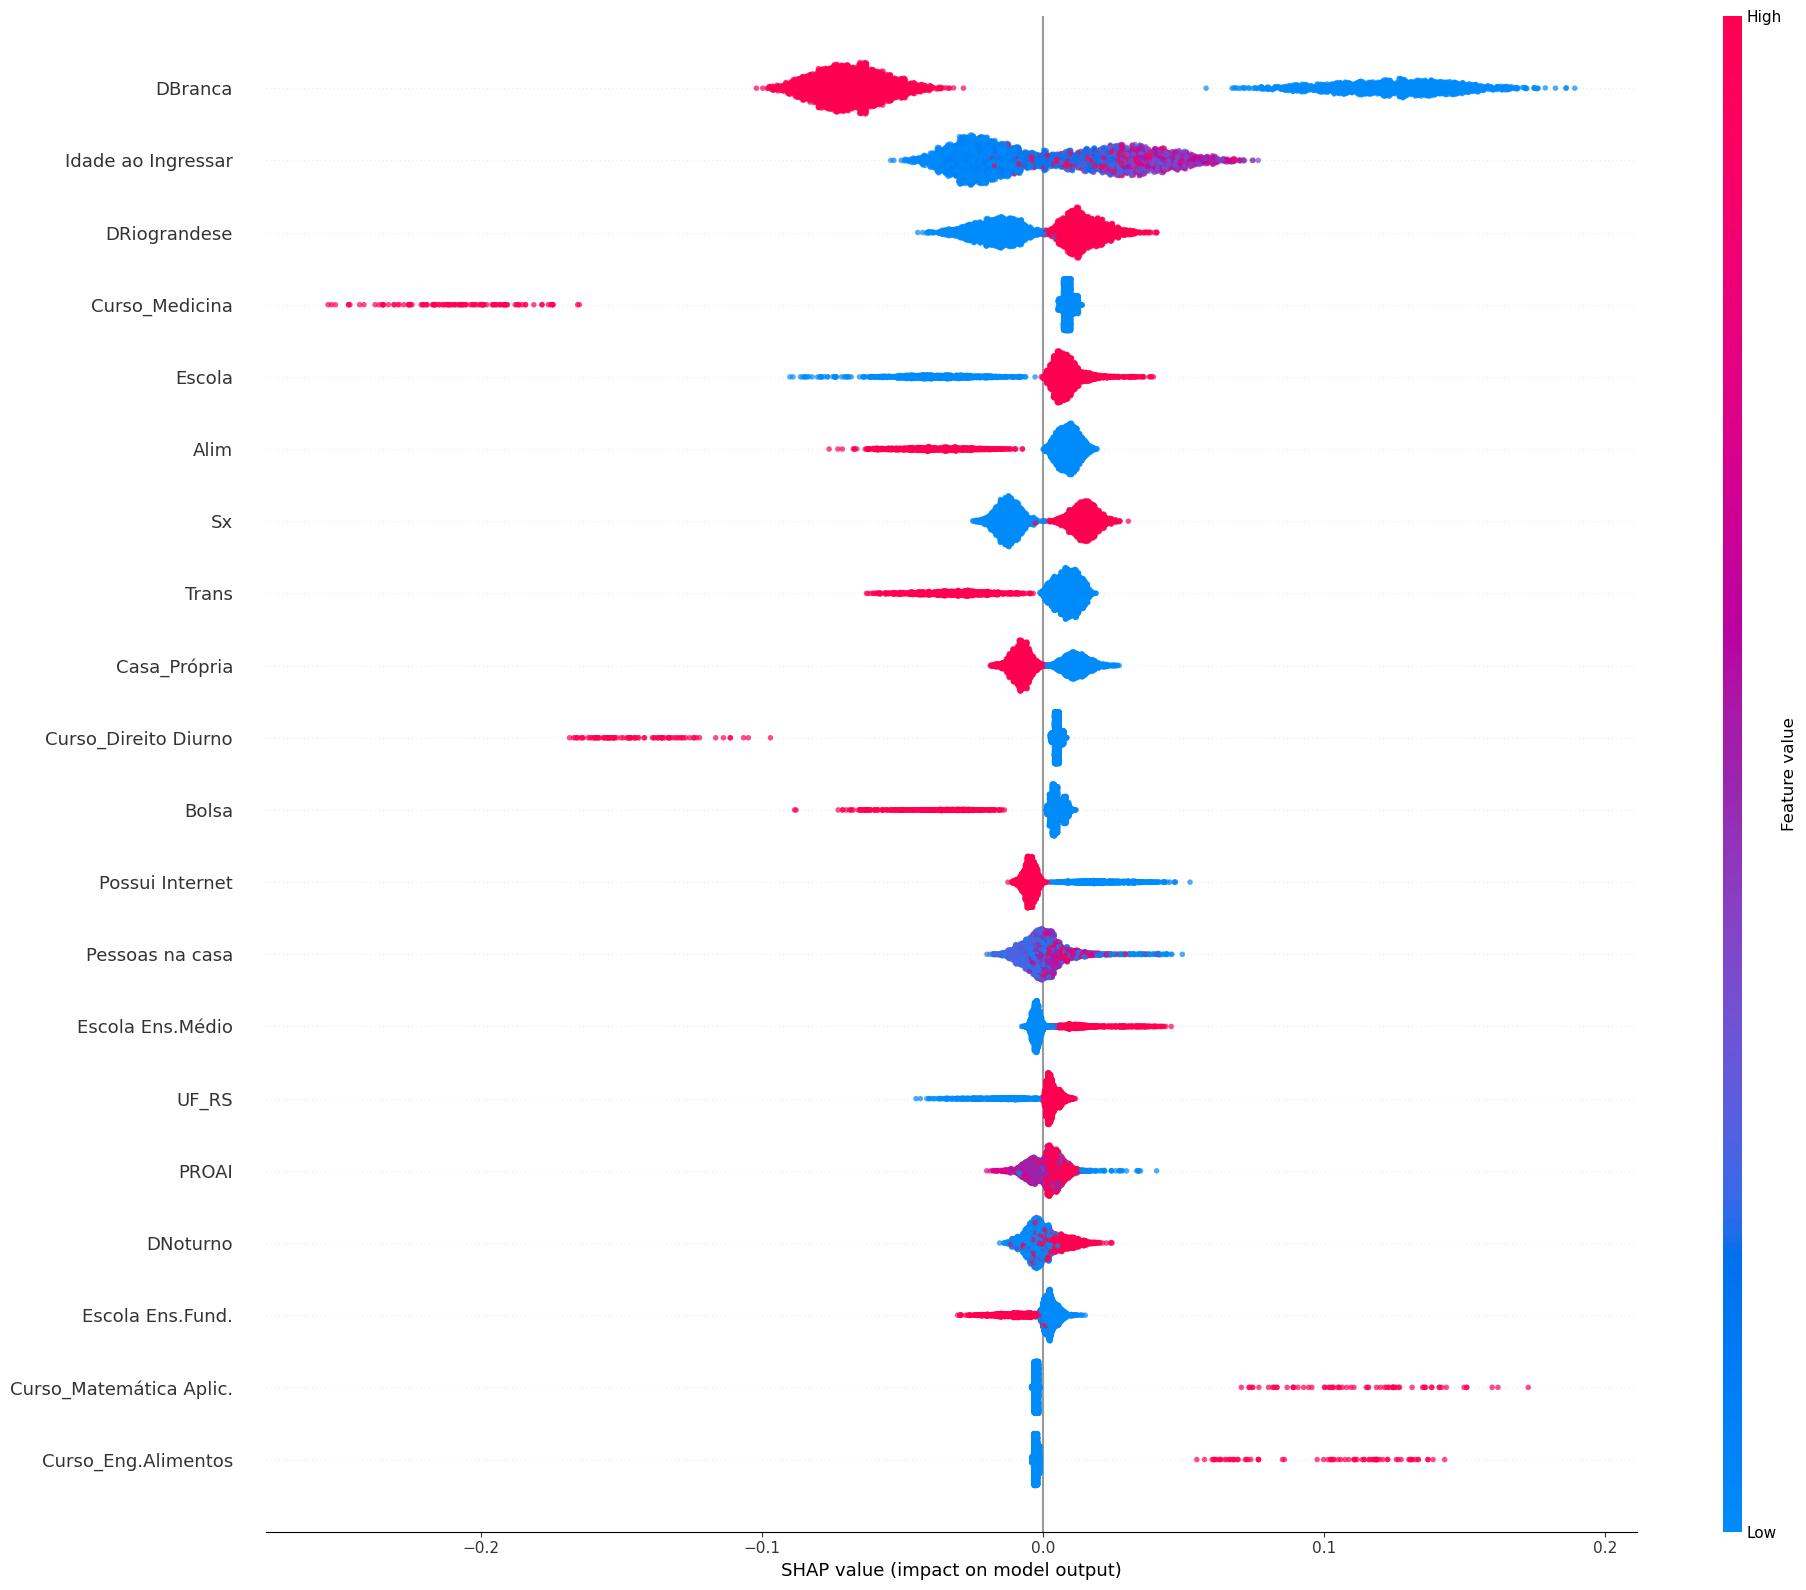

In [21]:

# Visualize os valores SHAP
shap.summary_plot(shap_values_class_1, X_treino, plot_type="dot",  # Usar o tipo "dot" para ajustar a transparência
    alpha=0.7,        # Ajusta a transparência dos pontos
    plot_size=(20, 16)) # Ajusta o tamanho geral do gráfico)


In [ ]:
shap.summary_plot(shap_values_class_1, X_treino, plot_type='violin',        # Ajusta a transparência dos pontos
    plot_size=(20, 16)) # Ajusta o tamanho geral do gráfico)


In [24]:
shap.initjs()
instance_index = 500  # Escolha uma instância
shap.plots.force(
    explainer.expected_value[1],  # Valor base para a classe positiva (ajuste conforme necessário)
    shap_values[instance_index, :, 1],  # Valores SHAP para a instância específica
    X_treino.iloc[instance_index]  # Dados da instância específica
)

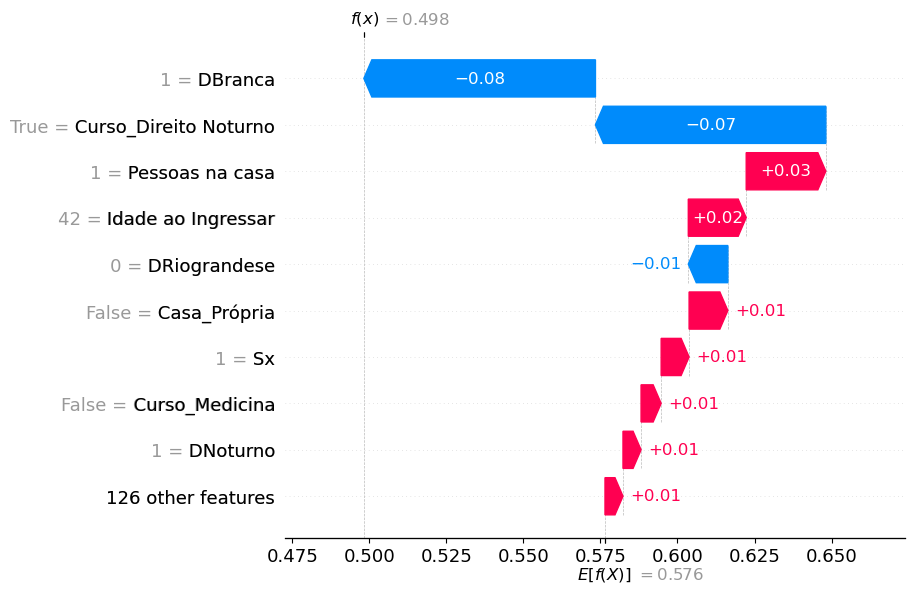

In [39]:
shap.initjs()

# Escolha uma instância específica
instance_index = 0  # Seleciona a instância

# Crie um objeto shap.Explanation para a instância específica
explanation = shap.Explanation(
    values=shap_values_class_1[instance_index],  # Valores SHAP para a instância específica
    base_values=explainer.expected_value[1],     # Valor base para a classe positiva (ajuste conforme necessário)
    data=X_treino.iloc[instance_index]             # Dados da instância específica
)

# Gere o gráfico de waterfall
shap.waterfall_plot(explanation)

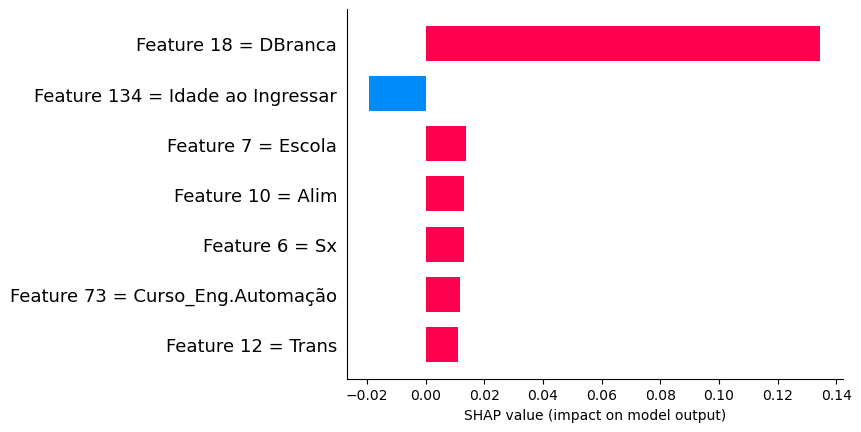

In [40]:
shap.bar_plot(shap_values_class_1[4], X_treino) # esse gráfico mostra para uma instância, quais características mais influenciaram para que ele evadisse


In [ ]:


y_prob = Modelo1.predict_proba(X_treino)[:, 1]  # Probabilidades para a classe positiva
fpr, tpr, _ = roc_curve(Y_treino, y_prob)
roc_auc = roc_auc_score(Y_treino, y_prob)

pltPP.figure(figsize=(8, 6))
pltPP.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
pltPP.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
pltPP.xlim([0.0, 1.0])
pltPP.ylim([0.0, 1.05])
pltPP.xlabel('Taxa de Falsos Positivos')
pltPP.ylabel('Taxa de Verdadeiros Positivos')
pltPP.title('Curva ROC')
pltPP.legend(loc='lower right')
pltPP.show()


In [ ]:
shap.dependence_plot('Região', shap_values_class_1, X_treino)


## prevendo os dados de teste 

In [20]:
y_teste_pred = Modelo1.predict(X_teste)


print("Acurácia do modelo para o teste:")

print(accuracy_score(Y_teste, y_teste_pred))
print('')
print("Matriz de confusão para o teste:")

print(confusion_matrix(Y_teste, y_teste_pred))

print("Precisão do modelo, call, f1-score e support:")
print(classification_report(Y_teste, y_teste_pred))

Acurácia do modelo para o teste:
0.7069167643610785

Matriz de confusão para o teste:
[[241 105]
 [145 362]]
Precisão do modelo, call, f1-score e support:
              precision    recall  f1-score   support

           0       0.62      0.70      0.66       346
           1       0.78      0.71      0.74       507

    accuracy                           0.71       853
   macro avg       0.70      0.71      0.70       853
weighted avg       0.71      0.71      0.71       853



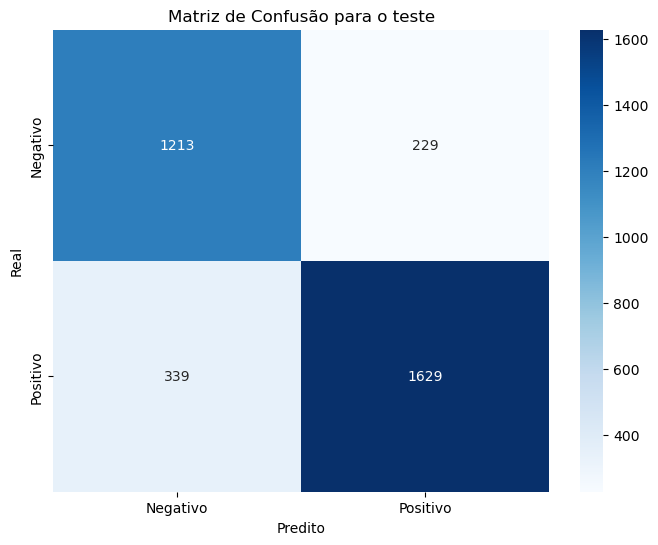

In [23]:
cm = confusion_matrix(Y_treino, Y_treino_pred)

pltPP.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negativo', 'Positivo'], 
            yticklabels=['Negativo', 'Positivo'])
pltPP.xlabel('Predito')
pltPP.ylabel('Real')
pltPP.title('Matriz de Confusão para o teste')
pltPP.show()


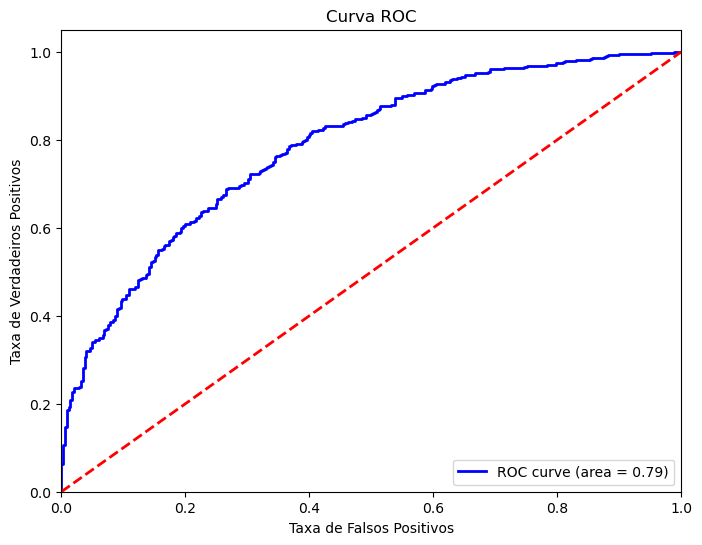

In [25]:

y_prob_teste = Modelo1.predict_proba(X_teste)[:, 1]  # Probabilidades para a classe positiva
fpr_teste, tpr_teste, _ = roc_curve(Y_teste, y_prob_teste)
roc_auc = roc_auc_score(Y_teste, y_prob_teste)

pltPP.figure(figsize=(8, 6))
pltPP.plot(fpr_teste, tpr_teste, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
pltPP.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
pltPP.xlim([0.0, 1.0])
pltPP.ylim([0.0, 1.05])
pltPP.xlabel('Taxa de Falsos Positivos')
pltPP.ylabel('Taxa de Verdadeiros Positivos')
pltPP.title('Curva ROC')
pltPP.legend(loc='lower right')
pltPP.show()

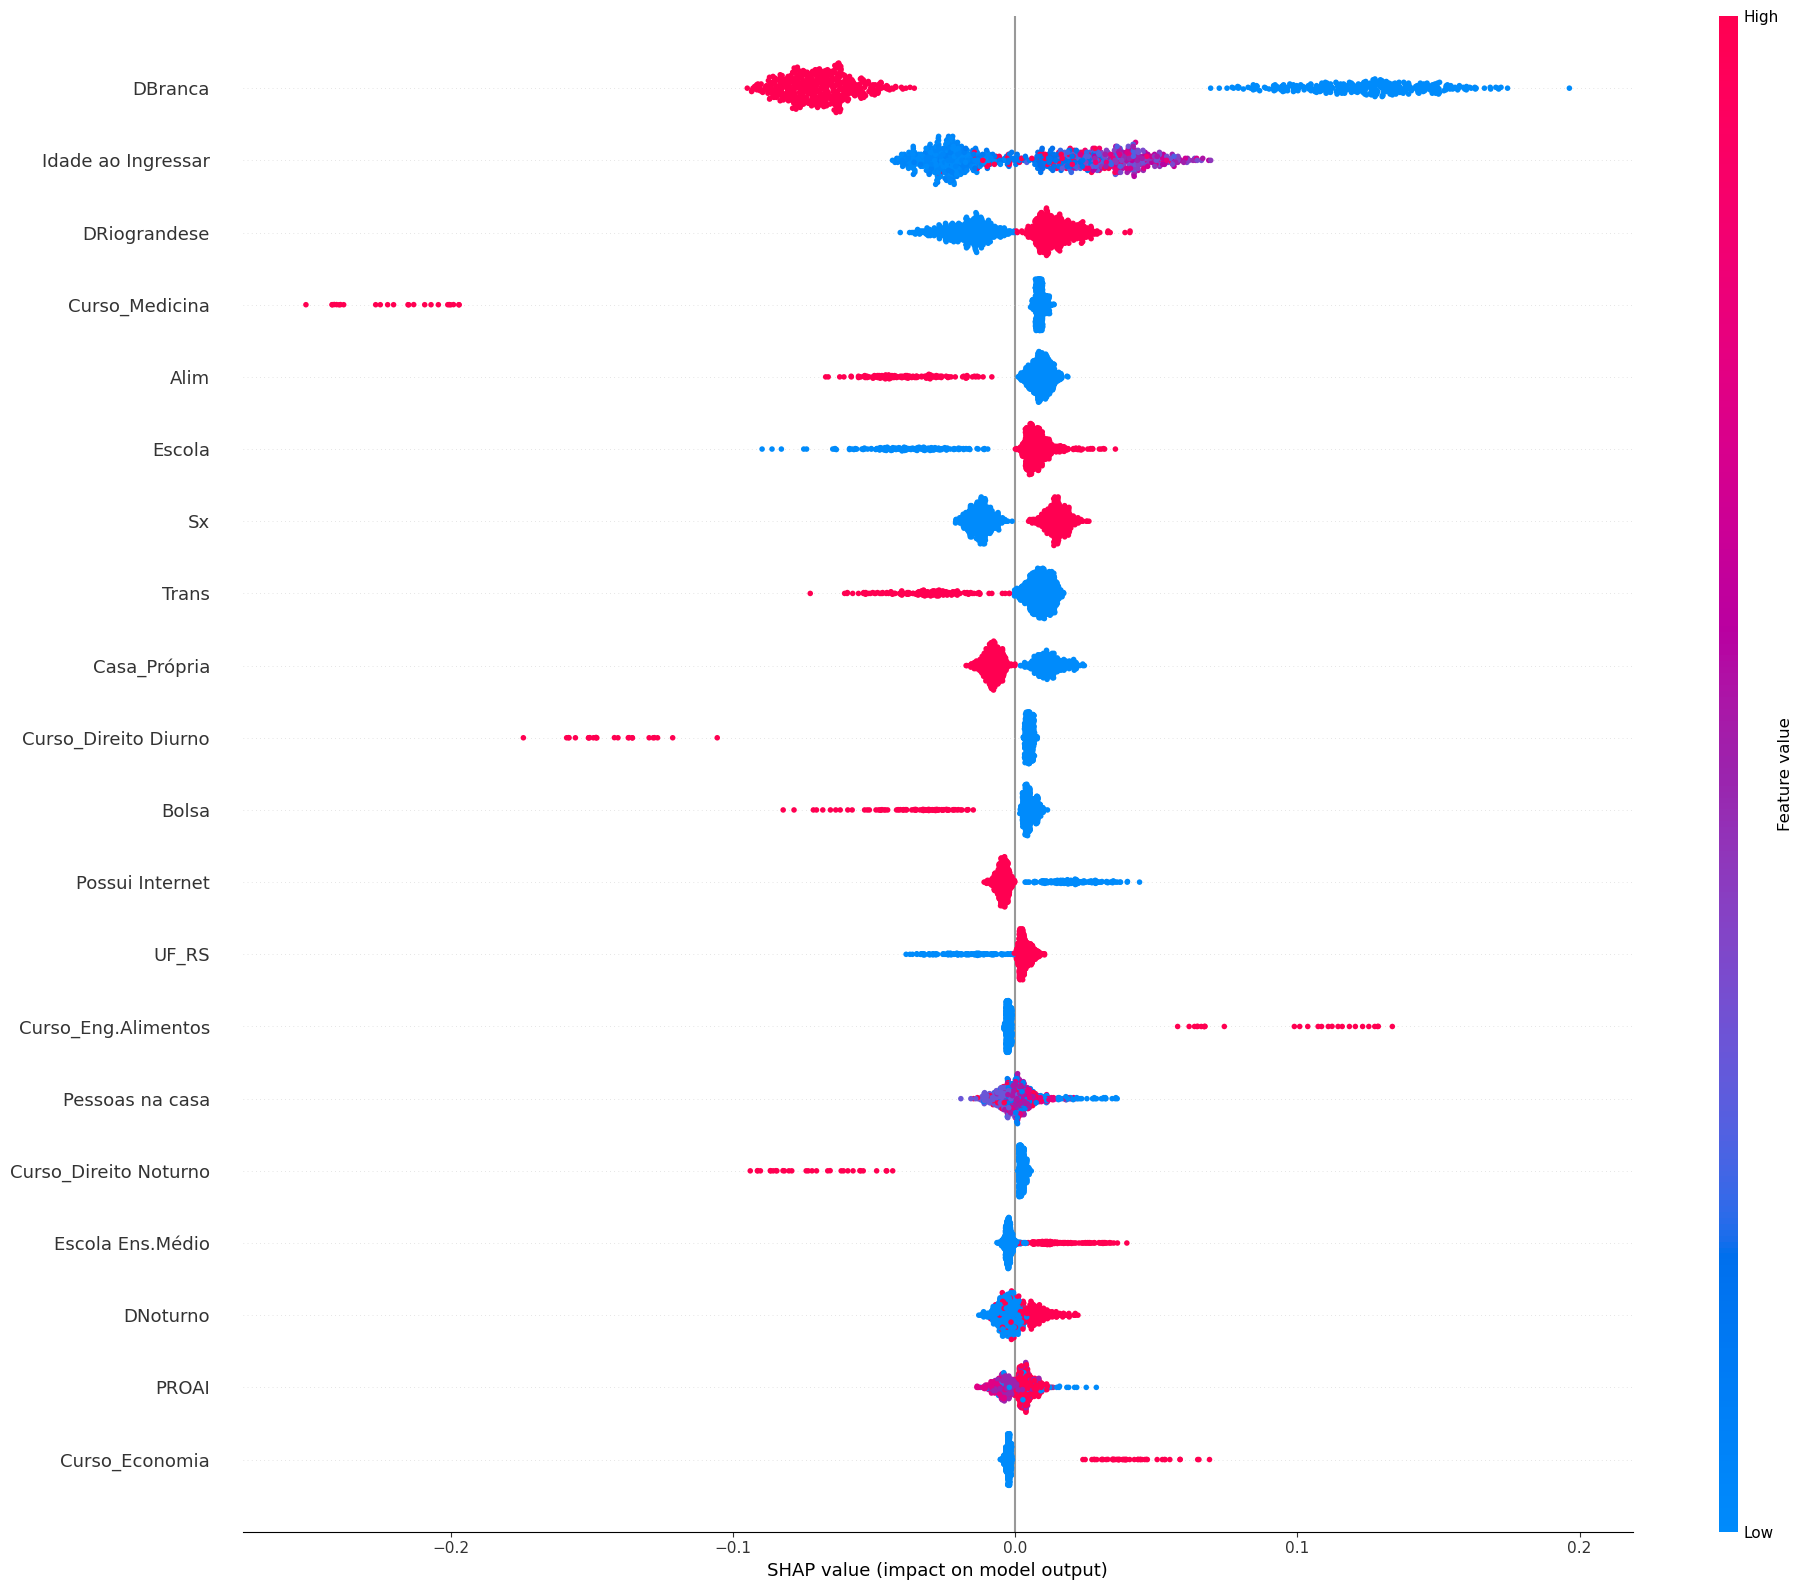

In [21]:
shap_values_teste = explainer.shap_values(X_teste)
shap_values_class_1_teste = shap_values_teste[:, :, 1]  

shap.summary_plot(shap_values_class_1_teste, X_teste, plot_type='dot',
                  plot_size=(20,16)        # Ajusta a transparência dos pontos
    ) # Ajusta o tamanho geral do gráfico)


In [29]:
shap_values_teste_df = pd.DataFrame(shap_values_class_1_teste, columns=X_teste.columns)
media_teste_shap = shap_values_teste_df.abs().mean().sort_values(ascending=False)

# Cria a tabela com os valores SHAP médios e o impacto
shap_summary_teste_table = pd.DataFrame({
    'Variable': media_teste_shap.index,
    'Mean SHAP Value': media_teste_shap.values
})

# Exibe a tabela
print(shap_summary_teste_table.head(15))

# Se quiser salvar em um arquivo CSV:
#shap_summary_table.to_csv('shap_summary_table.csv', index=False)

                Variable  Mean SHAP Value
0                DBranca         0.090563
1     Idade ao Ingressar         0.027190
2           DRiograndese         0.015630
3         Curso_Medicina         0.014792
4                   Alim         0.014082
5                 Escola         0.013918
6                     Sx         0.013540
7                  Trans         0.013078
8           Casa_Própria         0.009737
9   Curso_Direito Diurno         0.008966
10                 Bolsa         0.008349
11       Possui Internet         0.007582
12                 UF_RS         0.005518
13   Curso_Eng.Alimentos         0.005299
14       Pessoas na casa         0.005129


In [28]:
# Supondo que 'coluna' seja o nome da coluna na qual você deseja calcular a média dos valores positivos
media_valores_positivos = shap_summary_teste_table[shap_summary_teste_table['DBranca'] > 0]['DBranca'].mean()

print(media_valores_positivos)


KeyError: 'DBranca'